<a href="https://colab.research.google.com/github/Ruchika-11/EVA-7/blob/main/Assignment_6/Normalization_Assign_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
%matplotlib inline
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import StepLR,OneCycleLR
from torchsummary import summary


In [2]:
from google.colab import files
# uploaded = files.upload()

In [3]:
import model
from model import Net

# Model Params
Can't emphasize on how important viewing Model Summary is. 
Unfortunately, there is no in-built model visualizer, so we have to take external help

In [4]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net(normalization_type="group").to(device)
summary(model, input_size=(1, 28, 28))#print(Net)
# print(model.Net)


cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
         GroupNorm-2           [-1, 10, 26, 26]              20
              ReLU-3           [-1, 10, 26, 26]               0
            Conv2d-4           [-1, 20, 24, 24]           1,800
         GroupNorm-5           [-1, 20, 24, 24]              40
              ReLU-6           [-1, 20, 24, 24]               0
            Conv2d-7           [-1, 10, 24, 24]             200
         GroupNorm-8           [-1, 10, 24, 24]              20
              ReLU-9           [-1, 10, 24, 24]               0
        MaxPool2d-10           [-1, 10, 12, 12]               0
           Conv2d-11           [-1, 20, 10, 10]           1,800
        GroupNorm-12           [-1, 20, 10, 10]              40
             ReLU-13           [-1, 20, 10, 10]               0
           Conv2d-14             [

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [5]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net(normalization_type="layer").to(device)
summary(model, input_size=(1, 28, 28))#print(Net)
# print(model.Net)


cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
         GroupNorm-2           [-1, 10, 26, 26]              20
              ReLU-3           [-1, 10, 26, 26]               0
            Conv2d-4           [-1, 20, 24, 24]           1,800
         GroupNorm-5           [-1, 20, 24, 24]              40
              ReLU-6           [-1, 20, 24, 24]               0
            Conv2d-7           [-1, 10, 24, 24]             200
         GroupNorm-8           [-1, 10, 24, 24]              20
              ReLU-9           [-1, 10, 24, 24]               0
        MaxPool2d-10           [-1, 10, 12, 12]               0
           Conv2d-11           [-1, 20, 10, 10]           1,800
        GroupNorm-12           [-1, 20, 10, 10]              40
             ReLU-13           [-1, 20, 10, 10]               0
           Conv2d-14             [

In [6]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net(normalization_type="batch").to(device)
summary(model, input_size=(1, 28, 28))#print(Net)
# print(model.Net)


cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
       BatchNorm2d-2           [-1, 10, 26, 26]              20
              ReLU-3           [-1, 10, 26, 26]               0
            Conv2d-4           [-1, 20, 24, 24]           1,800
       BatchNorm2d-5           [-1, 20, 24, 24]              40
              ReLU-6           [-1, 20, 24, 24]               0
            Conv2d-7           [-1, 10, 24, 24]             200
       BatchNorm2d-8           [-1, 10, 24, 24]              20
              ReLU-9           [-1, 10, 24, 24]               0
        MaxPool2d-10           [-1, 10, 12, 12]               0
           Conv2d-11           [-1, 20, 10, 10]           1,800
      BatchNorm2d-12           [-1, 20, 10, 10]              40
             ReLU-13           [-1, 20, 10, 10]               0
           Conv2d-14             [

## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise. 


In [7]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                    #    transforms.ToPILImage(),
                                       transforms.RandomRotation((-7.5, 7.5), fill=(1,)),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


# Dataset and Creating Train/Test Split

In [8]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


# Dataloader Arguments & Test/Train Dataloaders


In [9]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


# Data Statistics

It is important to know your data very well. Let's check some of the statistics around our data and how it actually looks like

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(-0.4242)
 - max: tensor(2.8215)
 - mean: tensor(2.8017)
 - std: tensor(0.2500)
 - var: tensor(0.0625)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([128, 1, 28, 28])
torch.Size([128])


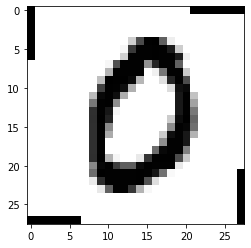

In [10]:
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
train_data = train.train_data
train_data = train.transform(train_data.numpy())

print('[Train]')
print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', train.train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))
print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')


## MORE

It is important that we view as many images as possible. This is required to get some idea on image augmentation later on

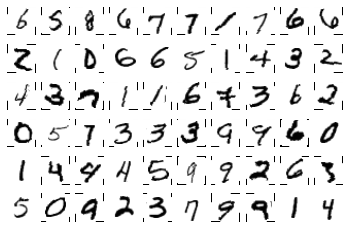

In [11]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# Training and Testing

Looking at logs can be boring, so we'll introduce **tqdm** progressbar to get cooler logs. 

Let's write train and test functions

In [12]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer, epoch,flag):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    # train_losses.append(loss)
    # loss =  F.mse_loss(y_pred, target)
    if flag==True:
        l1 = 0
        # l1_reg = None
        for W in model.parameters():
            l1 = l1+W.abs().sum()
        loss = loss + lambda_l1 *l1
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))

In [13]:
import matplotlib.pyplot as plt
def find_misclassified(test_loader, device):
        misclassified = []
        misclassified_prediction = []
        misclassified_target = []
        i=0
        # put the model to evaluation mode
        model.eval()
        # turn off gradients
        with torch.no_grad():
            for data, target in test_loader:
                # move them to the respective device
                data, target = data.to(device), target.to(device)
                # do inferencing
                output = model(data)
                # get the predicted output
                pred = output.argmax(dim=1, keepdim=True)

                # get the current misclassified in this batch
                list_misclassified = (pred.eq(target.view_as(pred)) == False)
                batch_misclassified = data[list_misclassified]
                batch_mis_prediction = pred[list_misclassified]
                batch_mis_target = target.view_as(pred)[list_misclassified]

                # batch_misclassified

                misclassified.append(batch_misclassified)
                misclassified_prediction.append(batch_mis_prediction)
                misclassified_target.append(batch_mis_target)
                i =i+1
                if i>=10:
                    break

        # group all the batched together
        misclassified = torch.cat(misclassified)
        misclassified_pred = torch.cat(misclassified_prediction)
        misclassified_target = torch.cat(misclassified_target)
        ncols=5
        image_data, predicted, actual=misclassified, misclassified_pred, misclassified_target
        fig, ax = plt.subplots(2,5,figsize=(8, 4))
        for i in range(2):
            for j in range(5):
                index = i * ncols + j 
                ax[i, j].axis("off")
                ax[i, j].set_title("  Predicted: %d\nActual: %d" % (predicted[index], actual[index]))
                ax[i, j].imshow(image_data[index].cpu().numpy(), cmap="gray_r")


# find_misclassified(test_loader, device)

# EPOCH

In [14]:
model = Net(normalization_type="group").to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
train_losses = []
test_losses = []
train_acc = []
test_acc = []

print("*-*-*-*-*- Group Normalization -*-*-*-*-*")
for epoch in range(1, 21):
    print("EPOCH:", epoch, "LR = ", scheduler.get_lr())
    train(model, device, train_loader, optimizer, epoch,flag=False)
    test(model, device, test_loader)
    scheduler.step()

g_train_losses = train_losses
g_test_losses = test_losses 
g_train_acc = train_acc
g_test_acc = test_acc



/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:370: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)


*-*-*-*-*- Group Normalization -*-*-*-*-*
EPOCH: 1 LR =  [0.01]


  0%|          | 0/469 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Loss=0.3671379089355469 Batch_id=468 Accuracy=75.51: 100%|██████████| 469/469 [00:35<00:00, 13.18it/s]



Test set: Average loss: 0.3927, Accuracy: 9430/10000 (94.30%)

EPOCH: 2 LR =  [0.01]


Loss=0.23461882770061493 Batch_id=468 Accuracy=95.42: 100%|██████████| 469/469 [00:35<00:00, 13.19it/s]



Test set: Average loss: 0.2005, Accuracy: 9657/10000 (96.57%)

EPOCH: 3 LR =  [0.01]


Loss=0.11734359711408615 Batch_id=468 Accuracy=97.03: 100%|██████████| 469/469 [00:35<00:00, 13.39it/s]



Test set: Average loss: 0.1177, Accuracy: 9806/10000 (98.06%)

EPOCH: 4 LR =  [0.01]


Loss=0.1700505167245865 Batch_id=468 Accuracy=97.60: 100%|██████████| 469/469 [00:35<00:00, 13.23it/s]



Test set: Average loss: 0.1094, Accuracy: 9775/10000 (97.75%)

EPOCH: 5 LR =  [0.01]


Loss=0.09525295346975327 Batch_id=468 Accuracy=97.83: 100%|██████████| 469/469 [00:35<00:00, 13.11it/s]



Test set: Average loss: 0.1017, Accuracy: 9792/10000 (97.92%)

EPOCH: 6 LR =  [0.01]


Loss=0.09784889221191406 Batch_id=468 Accuracy=98.10: 100%|██████████| 469/469 [00:35<00:00, 13.08it/s]



Test set: Average loss: 0.0658, Accuracy: 9864/10000 (98.64%)

EPOCH: 7 LR =  [0.0001]


Loss=0.02813950926065445 Batch_id=468 Accuracy=98.62: 100%|██████████| 469/469 [00:35<00:00, 13.35it/s]



Test set: Average loss: 0.0558, Accuracy: 9895/10000 (98.95%)

EPOCH: 8 LR =  [0.001]


Loss=0.08862251788377762 Batch_id=468 Accuracy=98.73: 100%|██████████| 469/469 [00:35<00:00, 13.06it/s]



Test set: Average loss: 0.0543, Accuracy: 9896/10000 (98.96%)

EPOCH: 9 LR =  [0.001]


Loss=0.060075681656599045 Batch_id=468 Accuracy=98.72: 100%|██████████| 469/469 [00:35<00:00, 13.12it/s]



Test set: Average loss: 0.0550, Accuracy: 9900/10000 (99.00%)

EPOCH: 10 LR =  [0.001]


Loss=0.05466737225651741 Batch_id=468 Accuracy=98.73: 100%|██████████| 469/469 [00:35<00:00, 13.33it/s]



Test set: Average loss: 0.0537, Accuracy: 9904/10000 (99.04%)

EPOCH: 11 LR =  [0.001]


Loss=0.05583188310265541 Batch_id=468 Accuracy=98.76: 100%|██████████| 469/469 [00:35<00:00, 13.32it/s]



Test set: Average loss: 0.0514, Accuracy: 9910/10000 (99.10%)

EPOCH: 12 LR =  [0.001]


Loss=0.02785276621580124 Batch_id=468 Accuracy=98.75: 100%|██████████| 469/469 [00:35<00:00, 13.07it/s]



Test set: Average loss: 0.0509, Accuracy: 9909/10000 (99.09%)

EPOCH: 13 LR =  [1e-05]


Loss=0.09667029976844788 Batch_id=468 Accuracy=98.86: 100%|██████████| 469/469 [00:36<00:00, 12.99it/s]



Test set: Average loss: 0.0505, Accuracy: 9906/10000 (99.06%)

EPOCH: 14 LR =  [0.0001]


Loss=0.02779347263276577 Batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:35<00:00, 13.08it/s]



Test set: Average loss: 0.0504, Accuracy: 9906/10000 (99.06%)

EPOCH: 15 LR =  [0.0001]


Loss=0.04312371090054512 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:36<00:00, 12.92it/s]



Test set: Average loss: 0.0503, Accuracy: 9904/10000 (99.04%)

EPOCH: 16 LR =  [0.0001]


Loss=0.05307503044605255 Batch_id=468 Accuracy=98.91: 100%|██████████| 469/469 [00:36<00:00, 12.92it/s]



Test set: Average loss: 0.0502, Accuracy: 9910/10000 (99.10%)

EPOCH: 17 LR =  [0.0001]


Loss=0.08596853166818619 Batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:36<00:00, 13.01it/s]



Test set: Average loss: 0.0502, Accuracy: 9911/10000 (99.11%)

EPOCH: 18 LR =  [0.0001]


Loss=0.04652873054146767 Batch_id=468 Accuracy=98.87: 100%|██████████| 469/469 [00:36<00:00, 12.99it/s]



Test set: Average loss: 0.0500, Accuracy: 9912/10000 (99.12%)

EPOCH: 19 LR =  [1.0000000000000002e-06]


Loss=0.028192734345793724 Batch_id=468 Accuracy=98.89: 100%|██████████| 469/469 [00:36<00:00, 12.82it/s]



Test set: Average loss: 0.0499, Accuracy: 9913/10000 (99.13%)

EPOCH: 20 LR =  [1e-05]


Loss=0.06538865715265274 Batch_id=468 Accuracy=98.84: 100%|██████████| 469/469 [00:36<00:00, 12.92it/s]



Test set: Average loss: 0.0499, Accuracy: 9912/10000 (99.12%)



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


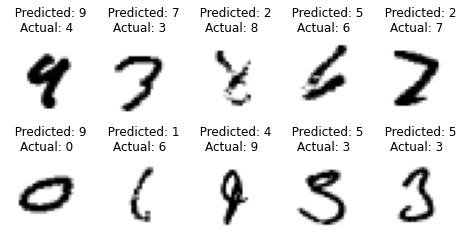

In [15]:
## Group Normalization
find_misclassified(test_loader, device)

In [16]:
model = Net(normalization_type="layer").to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
train_losses = []
test_losses = []
train_acc = []
test_acc = []
print("*-*-*-*-*- Layer Normalization -*-*-*-*-*")
for epoch in range(1, 21):
    print("EPOCH:", epoch, "LR = ", scheduler.get_lr())
    train(model, device, train_loader, optimizer, epoch,flag=False)
    test(model, device, test_loader)
    scheduler.step()
    
l_train_losses = train_losses
l_test_losses = test_losses 
l_train_acc = train_acc
l_test_acc = test_acc




/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:370: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)


*-*-*-*-*- Layer Normalization -*-*-*-*-*
EPOCH: 1 LR =  [0.01]


  0%|          | 0/469 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Loss=0.41785702109336853 Batch_id=468 Accuracy=80.17: 100%|██████████| 469/469 [00:36<00:00, 12.97it/s]



Test set: Average loss: 0.1962, Accuracy: 9679/10000 (96.79%)

EPOCH: 2 LR =  [0.01]


Loss=0.1397825926542282 Batch_id=468 Accuracy=96.43: 100%|██████████| 469/469 [00:36<00:00, 12.78it/s]



Test set: Average loss: 0.0938, Accuracy: 9805/10000 (98.05%)

EPOCH: 3 LR =  [0.01]


Loss=0.14634287357330322 Batch_id=468 Accuracy=97.23: 100%|██████████| 469/469 [00:36<00:00, 12.86it/s]



Test set: Average loss: 0.1152, Accuracy: 9713/10000 (97.13%)

EPOCH: 4 LR =  [0.01]


Loss=0.07922393083572388 Batch_id=468 Accuracy=97.67: 100%|██████████| 469/469 [00:35<00:00, 13.04it/s]



Test set: Average loss: 0.0619, Accuracy: 9855/10000 (98.55%)

EPOCH: 5 LR =  [0.01]


Loss=0.14364399015903473 Batch_id=468 Accuracy=97.99: 100%|██████████| 469/469 [00:35<00:00, 13.03it/s]



Test set: Average loss: 0.0528, Accuracy: 9879/10000 (98.79%)

EPOCH: 6 LR =  [0.01]


Loss=0.03686095401644707 Batch_id=468 Accuracy=98.05: 100%|██████████| 469/469 [00:36<00:00, 12.92it/s]



Test set: Average loss: 0.0504, Accuracy: 9871/10000 (98.71%)

EPOCH: 7 LR =  [0.0001]


Loss=0.036910150200128555 Batch_id=468 Accuracy=98.78: 100%|██████████| 469/469 [00:36<00:00, 12.80it/s]



Test set: Average loss: 0.0377, Accuracy: 9911/10000 (99.11%)

EPOCH: 8 LR =  [0.001]


Loss=0.034685663878917694 Batch_id=468 Accuracy=98.83: 100%|██████████| 469/469 [00:36<00:00, 12.72it/s]



Test set: Average loss: 0.0381, Accuracy: 9907/10000 (99.07%)

EPOCH: 9 LR =  [0.001]


Loss=0.01872953772544861 Batch_id=468 Accuracy=98.91: 100%|██████████| 469/469 [00:36<00:00, 12.78it/s]



Test set: Average loss: 0.0357, Accuracy: 9915/10000 (99.15%)

EPOCH: 10 LR =  [0.001]


Loss=0.030992478132247925 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:35<00:00, 13.03it/s]



Test set: Average loss: 0.0361, Accuracy: 9909/10000 (99.09%)

EPOCH: 11 LR =  [0.001]


Loss=0.061851102858781815 Batch_id=468 Accuracy=98.94: 100%|██████████| 469/469 [00:35<00:00, 13.07it/s]



Test set: Average loss: 0.0363, Accuracy: 9910/10000 (99.10%)

EPOCH: 12 LR =  [0.001]


Loss=0.03686002641916275 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:36<00:00, 12.97it/s]



Test set: Average loss: 0.0351, Accuracy: 9915/10000 (99.15%)

EPOCH: 13 LR =  [1e-05]


Loss=0.09130281209945679 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:36<00:00, 12.81it/s]



Test set: Average loss: 0.0346, Accuracy: 9914/10000 (99.14%)

EPOCH: 14 LR =  [0.0001]


Loss=0.04767979308962822 Batch_id=468 Accuracy=98.99: 100%|██████████| 469/469 [00:36<00:00, 12.89it/s]



Test set: Average loss: 0.0345, Accuracy: 9920/10000 (99.20%)

EPOCH: 15 LR =  [0.0001]


Loss=0.027390221133828163 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:36<00:00, 12.75it/s]



Test set: Average loss: 0.0346, Accuracy: 9916/10000 (99.16%)

EPOCH: 16 LR =  [0.0001]


Loss=0.0171355027705431 Batch_id=468 Accuracy=99.04: 100%|██████████| 469/469 [00:36<00:00, 12.84it/s]



Test set: Average loss: 0.0342, Accuracy: 9918/10000 (99.18%)

EPOCH: 17 LR =  [0.0001]


Loss=0.023418806493282318 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [00:36<00:00, 12.77it/s]



Test set: Average loss: 0.0342, Accuracy: 9921/10000 (99.21%)

EPOCH: 18 LR =  [0.0001]


Loss=0.024583114311099052 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:36<00:00, 12.83it/s]



Test set: Average loss: 0.0345, Accuracy: 9918/10000 (99.18%)

EPOCH: 19 LR =  [1.0000000000000002e-06]


Loss=0.09829416126012802 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:36<00:00, 12.79it/s]



Test set: Average loss: 0.0344, Accuracy: 9918/10000 (99.18%)

EPOCH: 20 LR =  [1e-05]


Loss=0.01788354478776455 Batch_id=468 Accuracy=99.01: 100%|██████████| 469/469 [00:36<00:00, 12.71it/s]



Test set: Average loss: 0.0343, Accuracy: 9920/10000 (99.20%)



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


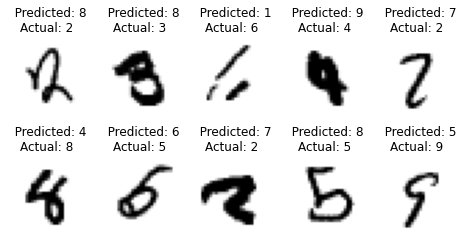

In [17]:
## Layer Normalization
find_misclassified(test_loader, device)

In [18]:
from torch.optim.lr_scheduler import StepLR,OneCycleLR

# will be used while plotting graphs
lambda_l1 = 0.0001
train_losses = []
test_losses = []
train_acc = []
test_acc = []

training_losses_group = []
testing_losses_group = []
training_accuracy_group = []
testing_accuracy_group = []

print("*-*-*-*-*- Batch Normalization -*-*-*-*-*")
model = Net(normalization_type="batch").to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, 21):
    print("EPOCH:", epoch)#, "LR = ", scheduler.get_lr())
    train(model, device, train_loader, optimizer, epoch,flag=True)
    test(model, device, test_loader)

b_train_losses = train_losses
b_test_losses = test_losses 
b_train_acc = train_acc
b_test_acc = test_acc


*-*-*-*-*- Batch Normalization -*-*-*-*-*
EPOCH: 1


  0%|          | 0/469 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Loss=0.2258138507604599 Batch_id=468 Accuracy=88.87: 100%|██████████| 469/469 [00:37<00:00, 12.40it/s]



Test set: Average loss: 0.1762, Accuracy: 9676/10000 (96.76%)

EPOCH: 2


Loss=0.20525459945201874 Batch_id=468 Accuracy=97.32: 100%|██████████| 469/469 [00:37<00:00, 12.40it/s]



Test set: Average loss: 0.1143, Accuracy: 9748/10000 (97.48%)

EPOCH: 3


Loss=0.18827605247497559 Batch_id=468 Accuracy=97.83: 100%|██████████| 469/469 [00:38<00:00, 12.27it/s]



Test set: Average loss: 0.0704, Accuracy: 9849/10000 (98.49%)

EPOCH: 4


Loss=0.09919938445091248 Batch_id=468 Accuracy=98.19: 100%|██████████| 469/469 [00:38<00:00, 12.24it/s]



Test set: Average loss: 0.0619, Accuracy: 9868/10000 (98.68%)

EPOCH: 5


Loss=0.13939981162548065 Batch_id=468 Accuracy=98.36: 100%|██████████| 469/469 [00:38<00:00, 12.25it/s]



Test set: Average loss: 0.0483, Accuracy: 9901/10000 (99.01%)

EPOCH: 6


Loss=0.13398377597332 Batch_id=468 Accuracy=98.49: 100%|██████████| 469/469 [00:38<00:00, 12.29it/s]



Test set: Average loss: 0.0452, Accuracy: 9886/10000 (98.86%)

EPOCH: 7


Loss=0.1316220462322235 Batch_id=468 Accuracy=98.58: 100%|██████████| 469/469 [00:38<00:00, 12.04it/s]



Test set: Average loss: 0.0512, Accuracy: 9870/10000 (98.70%)

EPOCH: 8


Loss=0.0985836535692215 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:38<00:00, 12.06it/s]



Test set: Average loss: 0.0468, Accuracy: 9876/10000 (98.76%)

EPOCH: 9


Loss=0.09616412222385406 Batch_id=468 Accuracy=98.71: 100%|██████████| 469/469 [00:38<00:00, 12.08it/s]



Test set: Average loss: 0.0398, Accuracy: 9899/10000 (98.99%)

EPOCH: 10


Loss=0.09946171939373016 Batch_id=468 Accuracy=98.75: 100%|██████████| 469/469 [00:38<00:00, 12.08it/s]



Test set: Average loss: 0.0456, Accuracy: 9880/10000 (98.80%)

EPOCH: 11


Loss=0.09155203402042389 Batch_id=468 Accuracy=98.76: 100%|██████████| 469/469 [00:38<00:00, 12.03it/s]



Test set: Average loss: 0.0387, Accuracy: 9888/10000 (98.88%)

EPOCH: 12


Loss=0.0786256343126297 Batch_id=468 Accuracy=98.75: 100%|██████████| 469/469 [00:38<00:00, 12.07it/s]



Test set: Average loss: 0.0422, Accuracy: 9899/10000 (98.99%)

EPOCH: 13


Loss=0.08891448378562927 Batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:38<00:00, 12.05it/s]



Test set: Average loss: 0.0354, Accuracy: 9905/10000 (99.05%)

EPOCH: 14


Loss=0.09723217785358429 Batch_id=468 Accuracy=98.80: 100%|██████████| 469/469 [00:38<00:00, 12.14it/s]



Test set: Average loss: 0.0360, Accuracy: 9907/10000 (99.07%)

EPOCH: 15


Loss=0.10428481549024582 Batch_id=468 Accuracy=98.87: 100%|██████████| 469/469 [00:38<00:00, 12.31it/s]



Test set: Average loss: 0.0381, Accuracy: 9906/10000 (99.06%)

EPOCH: 16


Loss=0.08313845098018646 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:38<00:00, 12.14it/s]



Test set: Average loss: 0.0356, Accuracy: 9904/10000 (99.04%)

EPOCH: 17


Loss=0.0997399389743805 Batch_id=468 Accuracy=98.90: 100%|██████████| 469/469 [00:38<00:00, 12.18it/s]



Test set: Average loss: 0.0366, Accuracy: 9907/10000 (99.07%)

EPOCH: 18


Loss=0.12549522519111633 Batch_id=468 Accuracy=98.91: 100%|██████████| 469/469 [00:38<00:00, 12.22it/s]



Test set: Average loss: 0.0314, Accuracy: 9907/10000 (99.07%)

EPOCH: 19


Loss=0.10669693350791931 Batch_id=468 Accuracy=98.99: 100%|██████████| 469/469 [00:38<00:00, 12.11it/s]



Test set: Average loss: 0.0318, Accuracy: 9918/10000 (99.18%)

EPOCH: 20


Loss=0.09591776132583618 Batch_id=468 Accuracy=98.94: 100%|██████████| 469/469 [00:38<00:00, 12.07it/s]



Test set: Average loss: 0.0365, Accuracy: 9901/10000 (99.01%)



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


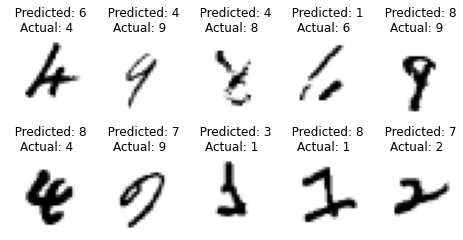

In [19]:
## Batch Normalization
find_misclassified(test_loader, device)

# Let's plot the graph of Test Losses and Test Accuracy for all the Normalization Techniques 

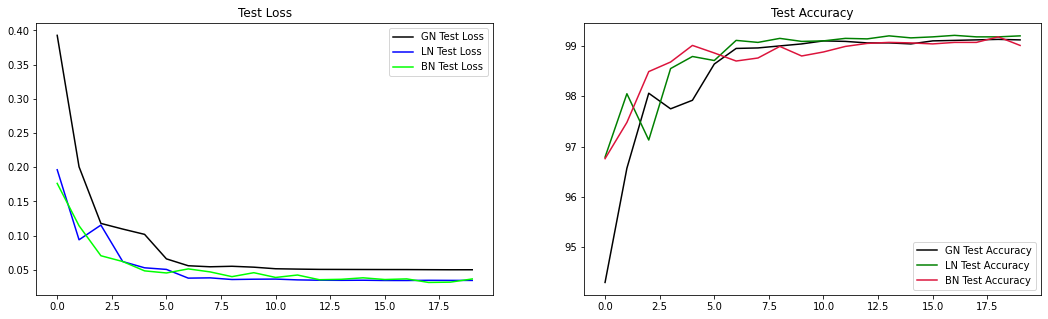

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,5))
ax1 = ax[0]
ax1.set_title("Test Loss")
ax1.plot(g_test_losses,color="black", label="GN Test Loss")
ax1.plot(l_test_losses, color="blue", label="LN Test Loss")
ax1.plot(b_test_losses, color="lime", label="BN Test Loss")
ax1.legend()
ax2 = ax[1]
ax2.set_title("Test Accuracy")
ax2.plot(g_test_acc, color="black", label="GN Test Accuracy")
ax2.plot(l_test_acc, color="green", label="LN Test Accuracy")
ax2.plot(b_test_acc, color="crimson", label="BN Test Accuracy")

ax2.legend()

plt.show()